# **Home Work Assignment #10**
                                                                                
## ***Redshift Of A Star-Forming Galaxy: The Orion Nebula***

##### Author : Spencer Long  
##### Class: Astro 320 Spectroscopy

---
---
---

# Imports

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from astropy.io import fits
from astropy import units as u

---
# Accessing Fits File Data

In [2]:
hdul = fits.open('/Users/Spencer/Desktop/Spectroscopy320/Spectra_Data/4.ELG.fits')

HIERARCHESO PRO CATG = 'MOS_SCIENCE_REDUCED' / Category of pipeline product      [astropy.io.fits.card]


In [3]:
manual = hdul[0].header # Assgining variable to call header data of fits file

In [4]:
data = hdul[0].data # Storing Flux density data into memory (will be used for our y axis)

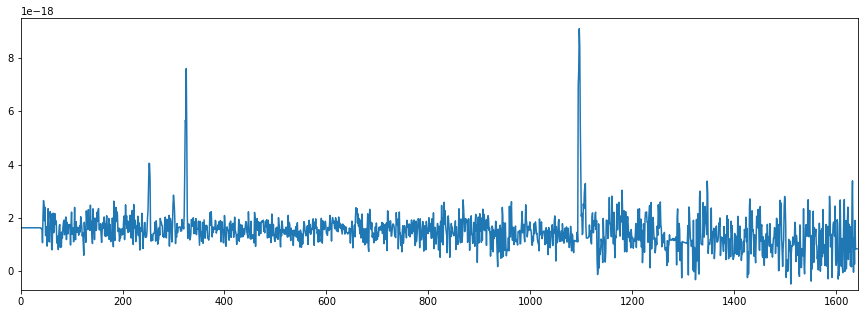

In [5]:
plt.figure(figsize=(15,5))
plt.xlim(data[0],len(data))
plt.ylim(-.7e-18,9.5e-18)
plt.plot(data) # Plotting flux data to take a quick look. 

In [6]:
manual

SIMPLE  =                    T / Java FITS: Wed Feb 28 14:35:12 HST 2018        
BITPIX  =                  -64                                                  
NAXIS   =                    1                                                  
NAXIS1  =                 1642                                                  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H   
COMMENT and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H   
ORIGIN  = 'ESO     '           /  European Southern Observatory                 
DATE    = '2006-07-04T19:07:02.098' /  Date this file was written               
MJD-OBS =       53884.00244171 / MJD start (2006-05-29T00:03:30.964)            
DATE-OBS= '2006-05-29T00:03:30.963' /  Date of observation                      
EXPTIME =                3600. / Total sequence integration time                
TELESCOP= 'ESO-VLT-U3'      

---

# Creating The X Axis

##### To calculate the proper x axis in which it was measured we need to find the so called shift of the x axis...

The shift is $crpix_1$ $\cdot$ $cdelt_1$ where crpix is the reference pixel value in angstroms and cdelt is the step size in angstroms per data point

In [7]:
shift_x = manual['CRPIX1']*manual['CDELT1']
shift_x

2096.013

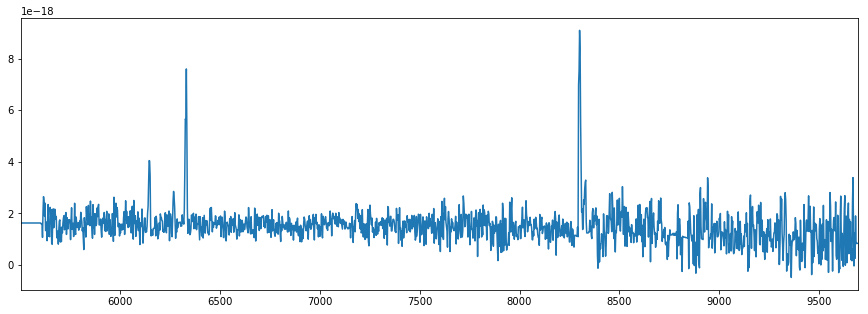

In [18]:
#np.arange(hdul[0].header['CRVAL1']-shift, data.shape[0]*hdul[0].header['CDELT1']+hdul[0].header['CRVAL1']-shift, hdul[0].header['CDELT1'])

x = np.arange(7598.57-shift_x,len(data) * 2.553+7598.57-shift_x,2.553)

plt.figure(figsize = (15, 5))
plt.xlim(x[0],x[-1])
plt.plot(x, data)

---
# Identifying Lines

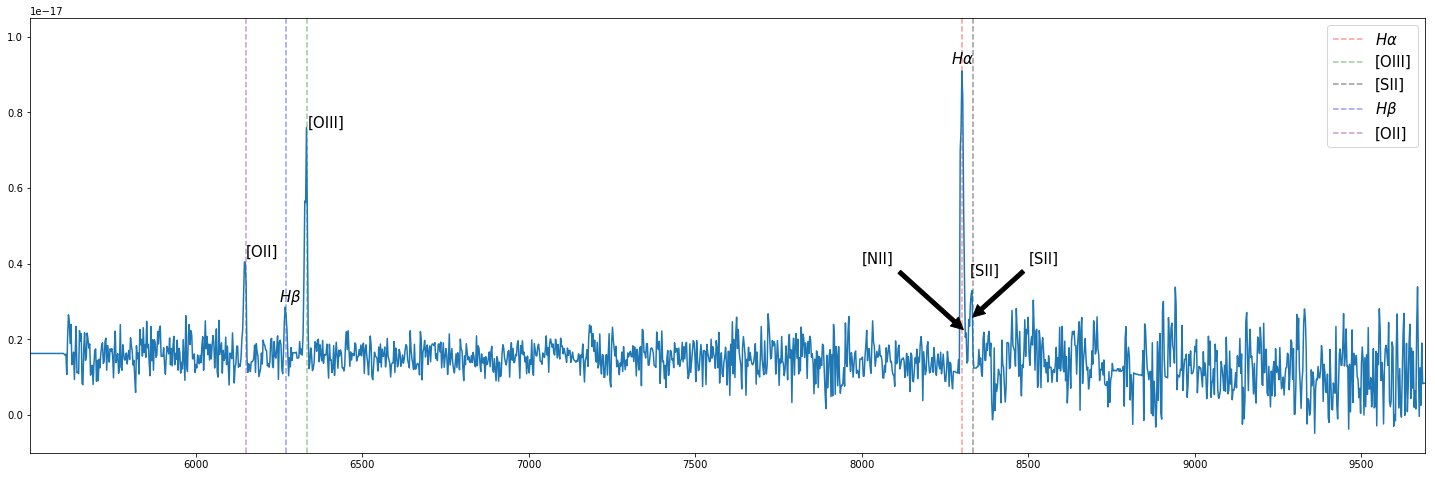

In [39]:
# Purpose of this assignment is to visually identify lines thus we will guess the line below is H-Alpha which is located at 1096 units

plt.figure(figsize=(25,8))

plt.axvline(x = 8301, color = 'red', label = r'$H\alpha$', ls = '--',alpha=0.4)
plt.axvline(x = 6335, color = 'green', label = '[OIII]', ls = '--',alpha=0.4)
plt.axvline(x = 8334, color = 'k', label = '[SII]', ls = '--',alpha=0.4)
plt.axvline(x = 6271, color = 'blue', label = r'$H\beta$', ls = '--',alpha=0.4)
plt.axvline(x = 6150, color = 'purple', label = '[OII]', ls = '--',alpha=0.4)

plt.annotate(r'$H\alpha$', xy=(8301,10e-18), xytext=(8268,9.3e-18), fontsize=15)
plt.annotate('[OIII]', xy=(6335,10e-18), xytext=(6335,7.6e-18), fontsize=15)
plt.annotate(r'$H\beta$', xy=(6271,10e-18), xytext=(6250,3e-18), fontsize=15)
plt.annotate('[OII]', xy=(6150,10e-18), xytext=(6150,4.2e-18), fontsize=15)
plt.annotate('[SII]', xy=(8334,10e-18), xytext=(8325,3.7e-18), fontsize=15)
plt.annotate('[NII]', xy=(8316, 2.17e-18), xytext=(8000,4e-18), arrowprops=dict(facecolor='black', shrink=0.05),fontsize=15)
plt.annotate('[SII]', xy=(8324, 2.517e-18), xytext=(8500,4e-18), arrowprops=dict(facecolor='black', shrink=0.05),fontsize=15)

plt.legend(fontsize=15)
plt.xlim(x[0],x[-1])
plt.ylim(-1e-18,10.5e-18)
plt.plot(x,data) # Plotting flux data to take a quick look. 


# Creating A Dataframe For Our Line Data

In [56]:
# Calculates redshift due to the doppler effect

def doppler_shift(rest_wavelength, shift_wavelength):
    
    shift = (shift_wavelength - rest_wavelength)/rest_wavelength
    
    return shift

In [95]:
# Index labels for dataframe
indexx = [
          "Rest Wavelength " r'$(Angstroms)$' ,
          'Central Wavelength ' r'$(Angstroms)$', 
          'Equivalent Widths ' r'$(Angstroms)$',
          "Redshift " r'$(Z)$'
         ] 

# Identified lines for the columns of our dataframe
identified_lines = [
                    '[OII]',
                    r'$H\beta$',
                    '[OIII]',
                    r'$H\alpha$',
                    '[NII]',
                    '[SII]',
                    '[SII]'
                   ]

# Rest wavelengths for dataframe and calculations obtained from research paper for the Orion nebula
rwl = [3726.03,4861.33,4958.91,6562.82,6583.41,6716.47,6730.85]

# Central wavelength that was calculated using Pyraf's splot feature with a gaussian fit for each line   
cwl = [6149.49, 6271.97, 6333.43, 8303.05, 8316.01, 8323.6, 8332.26]

# Equivalent width that was calculated using Pyraf's splot feature with a gaussian fit for each line   
eqw = [-25.82, -17.6, -40.54, -53.64, -0.837, -0.737, -5.767]

# Redshift values for identified lines 
redshift_z = []

for i in range(0,len(rwl)):
    z = doppler_shift(rwl[i],cwl[i]) 
    redshift_z.append(z)

In [123]:
# Creating a dataframe to place all of our calculated data for each individual Balmer line. 
df = pd.DataFrame(data=[rwl,cwl,eqw,redshift_z], index=indexx, columns=identified_lines)
df

,[OII],$H\beta$,[OIII],$H\alpha$,[NII],[SII],[SII]
Rest Wavelength $(Angstroms)$,3726.030000,4861.330000,4958.910000,6562.820000,6583.410000,6716.470000,6730.850000
Central Wavelength $(Angstroms)$,6149.490000,6271.970000,6333.430000,8303.050000,8316.010000,8323.600000,8332.260000
Equivalent Widths $(Angstroms)$,-25.820000,-17.600000,-40.540000,-53.640000,-0.837000,-0.737000,-5.767000
Redshift $(Z)$,0.650413,0.290176,0.277182,0.265165,0.263177,0.239282,0.237921


### Mean Redshift: 

Mean = $\sum \frac{x_{i}}{n}$

In [129]:
mean_z = sum(redshift_z)/len(redshift_z)
print('The mean redshift is:', mean_z)

The mean redshift is: 0.3176165106630849


---
---
---
---

# Alligning Our X Axis With $H\alpha$ 

We find here that the spectra is actually stretched in different regions thus we can not simply just allign our x axis with $H\alpha$. As you will find below when we allign the axis with $H\alpha$ none of the other lines
end up were they should be found thus proving we can not use this method of line searching.

---

#### Locating $H\alpha$ and Calculating The Starting Wavelength Of Our X Axis:  

1096 units is where we find h-alpha before adjusting for any shifting on the x axis (h-alpha is the 1096 data point). Thus we now need to find how many angstroms we traveled starting from zero units to get to it. 
 
Shift = $H\alpha_{Lab}-$[$H\alpha_{identified} \cdot$ Stepsize(Angstroms))



In [97]:
6562 - 1096 * manual['CDELT1']

3763.9120000000003

True

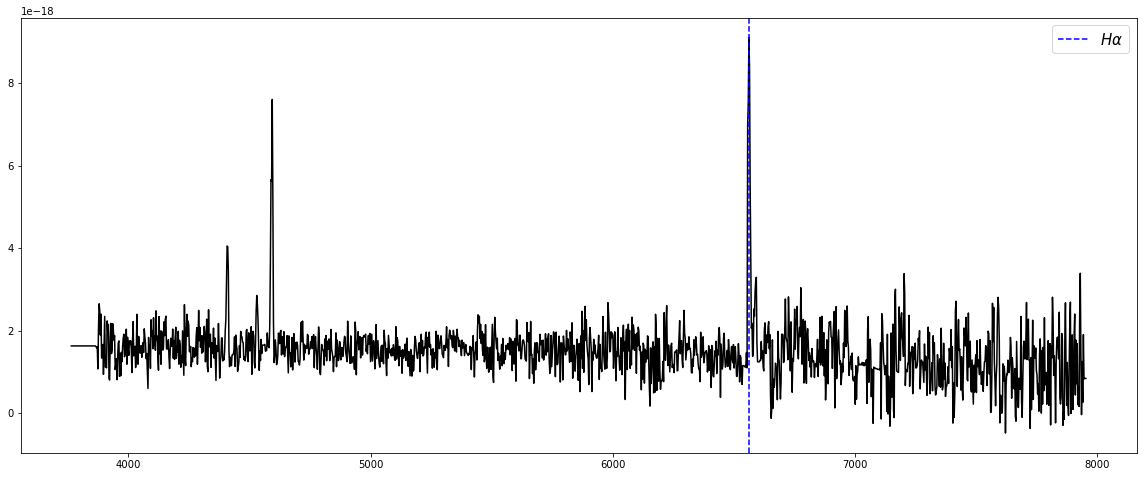

In [120]:
# Applying the starting wavelength to our x axis

# x = np.arange(above equation, len(data)*stepsize + above equation, step size)
x = np.arange(3764, len(data)*2.553+3764, 2.553)

plt.figure(figsize = (20, 8))
plt.plot(x, data, color='black')
plt.axvline(x = 6562, color = 'blue', label = r'$H\alpha$', ls = '--',alpha=1)
plt.legend(fontsize=15)

data.shape == x.shape # Verifies that we calculated the x axis correctly as it must be the same size as the y axis array

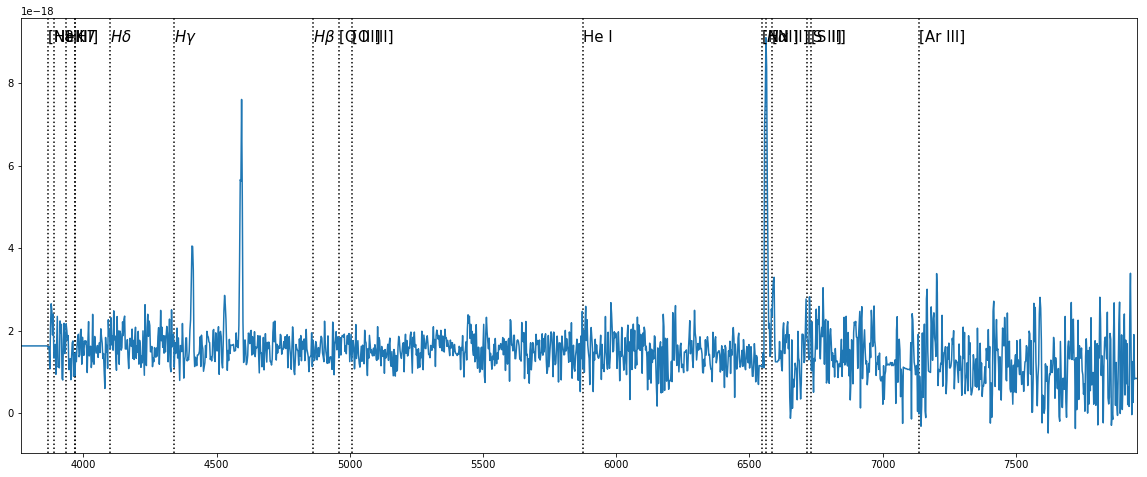

In [100]:
# Lines that are commanly be identifiable in a star forming type of galaxy
wave = [3868,3889,3933,3968,3970,4101,4340.5,4861,4958.8,5006.8,5875.6,6548,6562.8,6583.4,6716.5,6730,7135]
symbol = ['[Ne III]','H8','H','K','H7',r'$H\delta$',r'$H\gamma$',r'$H\beta$','[O III]','[O III]','He I','[N II]',r'$H\alpha$','[N II]','[S II]','[S II]','[Ar III]']

# Plottling lines with annotations 
plt.figure(figsize=(20,8))

for i in range(len(symbol)):
    
    plt.axvline(x = wave[i], color = 'k', ls=':')
    plt.annotate(symbol[i], xy=(wave[i],9e-18), xytext=(wave[i],9e-18), fontsize=15)

plt.xlim(x[0],x[-1])    
plt.plot(x,data)
plt.show()

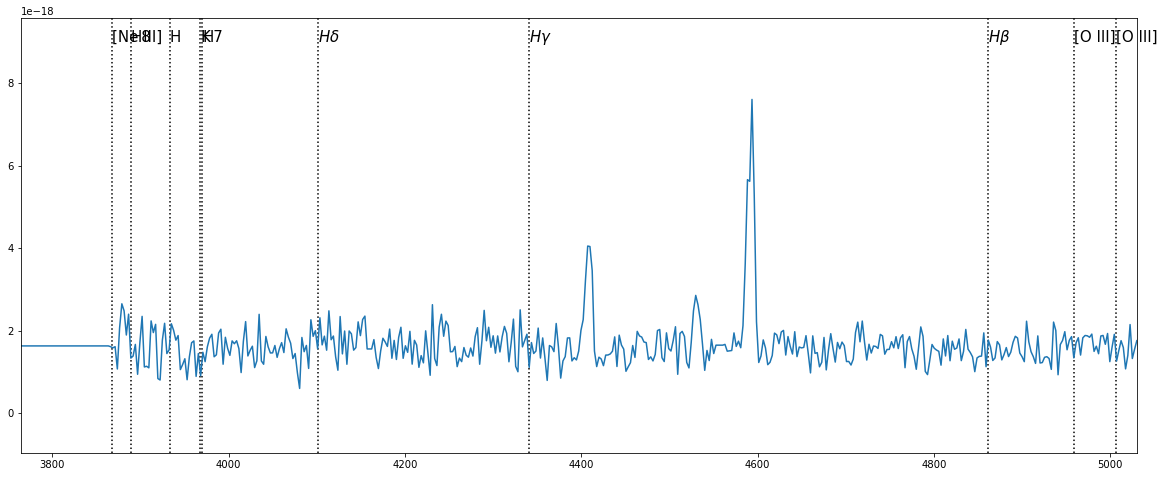

In [121]:
# lets take a closer look to see some of the lines more clearer... As we can see H-beta is nowhere close to where it should line up

wave = [3868,3889,3933,3968,3970,4101,4340.5,4861,4958.8,5006.8]
wave_string = ['3868','3889','3933','3968','3970','4101','4340.5','4861','4958.8','5006.8']
symbol = ['[Ne III]','H8','H','K','H7',r'$H\delta$',r'$H\gamma$',r'$H\beta$','[O III]','[O III]']

plt.figure(figsize=(20,8))

for i in range(len(symbol)):
    
    plt.axvline(x = wave[i], color = 'k', ls=':')
    plt.annotate(symbol[i], xy=(wave[i],9e-18), xytext=(wave[i],9e-18), fontsize=15)
    
plt.xlim(3764,5030)    
plt.plot(x,data)